# Telecom Customer Churn Prediction

<img src = https://d57439wlqx3vo.cloudfront.net/iblock/fba/fba0a0a157413b1ee9bc04edd9e7861a/2298095e630c7748c6f6e009e027ee06.png
     />
    
<font size=3>
<br/>
    
---
    
**What Is Churn Rate?**<br/>
The churn rate, also known as the rate of attrition or customer churn, is the rate at which customers stop doing business with an entity. It is most commonly expressed as the percentage of service subscribers who discontinue their subscriptions within a given time period. It is also the rate at which employees leave their jobs within a certain period. For a company to expand its clientele, its growth rate (measured by the number of new customers) must exceed its churn rate.
    
**Telecommunications Industry Churn Rates**<br/>
The churn rate is a particularly useful measurement in the telecommunications industry. This includes cable or satellite television providers, Internet providers, and telephone service providers (landline and wireless service providers).

As most customers have multiple options from which to choose, the churn rate helps a company determine how it is measuring up to its competitors. If one out of every 20 subscribers to a high-speed Internet service terminated their subscriptions within a year, the annual churn rate for that Internet provider would be 5%.

   
**Customer Churn Prediction**<br/>
Telecom companies often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients. The focus is on voluntary churn, because it typically occurs due to factors of the company-customer relationship which companies control, such as how billing interactions are handled or how after-sales help is provided.
    
Predictive analytics use churn prediction models that predict customer churn by assessing their propensity of risk to churn. Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn.

**<font color='green'>In this project we will use the Orange Telecom's Churn Dataset to predict customer churn which would help the company develop focused retention programs.</font>**
    
---

**Metric We Will Use**<br/>
 Now let’s consider precision and recall as they relate to churn.

Definitions:
 - **Precision:** Of all the users that the algorithm predicts will churn, how many of them do actually churn?
 - **Recall:** What percentage of users that end up churning does the algorithm successfully find?

**_Example of Precision_:**
Consider a re-engagement email campaign which says something like “We noticed you may be leaving us. Please don’t!” You’d likely want to ensure that the precision for this email was high. In other words, you would want to minimize the number of happy users who see this email, and instead have this email almost exclusively hit users in danger of churning.

**_Example of Recall_:**
On the other hand, consider an email that you want to send more broadly to your user base – maybe an offer to receive $5 of the next purchase. You’d be less concerned with users who are not in danger of churning receiving this marketing message. Ideally, though, you would want anyone who might churn to see the email. In this case, you would want your recall to be higher than your precision.

As you can see, both precision and recall are important for evaluating the performance of a churn prediction algorithm, so we will be using **F1-Score**

# Libraries and Data Imports

## Libraries Import

In [1]:
# Core and plotting libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Stats libraries
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

# ML libraries
# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.decomposition import PCA

# Metrics
from sklearn.metrics import f1_score, classification_report, make_scorer

# Pre-processing and Model Selection
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, FunctionTransformer, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Imblearn to handle imbalanced datasets
from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn import FunctionSampler

# To extract feature names
from sklearn.feature_selection._base import SelectorMixin
from sklearn.feature_extraction.text import _VectorizerMixin

# To create our custom function in Pipeline
from sklearn.base import TransformerMixin

# Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation
from keras.wrappers.scikit_learn import KerasClassifier

# Pipeline saving
import joblib

# Model Evaluation
import shap

#----------------------------------------------------------------
# Define Custom Plotting Template For Matplotlib
#----------------------------------------------------------------
large=20; med=16; small=14

# print(plt.style.available)
plt.style.use('ggplot')

params = {'font.family'      : 'monospace',
          'axes.titlesize'   : large,
          'axes.titleweight' : 'bold',
          'axes.labelsize'   : large,
          'axes.labelweight' : 'bold',
          'xtick.labelsize'  : small,
          'ytick.labelsize'  : small,
          'legend.fontsize'  : small,
          'figure.figsize'   : (8,8),
          'grid.alpha': 0.5}

plt.rcParams.update(params)

## Data Import

<font size=3>Test and Training data are in separate files so we will load them in two dataframes

In [2]:
df_test=pd.read_csv('/kaggle/input/telecom-churn-datasets/churn-bigml-20.csv')
df=pd.read_csv('/kaggle/input/telecom-churn-datasets/churn-bigml-80.csv')

# Data Stats

## Data Info
<font size=3>Quick info on the dataframe, null values and data types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

## Summary of Data
<font size=3>Table below is a basic summary of dataframe, to understand feature description, data types and  value range/unique values

<font size=3>
    
|Feature|Description|Range/Unique Values Stat|Data Type|
|---|---|---|---|
|**State**                   |State Code        |Unique values 51 | Categorical |
|**Account length**          |Length of Account | Range 1-243 | Integer |
|**Area code**               |Area Code   | Unique values 3 | Categorical |
|**International plan**      |Yes/No Flag | Unique values 2 | Categorical |
|**Voice mail plan**         |Yes/No Flag | Unique values 2 | Categorical |
|**Number vmail messages**   |Number of Voice mails | Range 0-50 |  Integer |
|**Total day minutes**       |Total Day call minutes    | Range 0-351 | Float |
|**Total day calls**         |Total Day number of calls | Range 0-160 | Integer |
|**Total day charge**        |Total Day charge amount   | Range 0-60 | Float |
|**Total eve minutes**       |Total Evening call minutes    | Range 0-364 | Float |
|**Total eve calls**         |Total Evening number of calls | Range 0-170 | Integer |
|**Total eve charge**        |Total Evening charge amount   | Range 0-31 | Float |
|**Total night minutes**     |Total Night call minutes    | Range 44-395 | Float |
|**Total night calls**       |Total Night number of calls | Range 33-166 | Integer |
|**Total night charge**      |Total Night charge amount   | Range 0-18 | Float |
|**Total intl minutes**      |Total International call minutes    | Range 0-20 | Float |
|**Total intl calls**        |Total International number of calls | Range 0-20 | Integer |
|**Total intl charge**       |Total International charge amount   | Range 0-5 | Float |
|**Customer service calls**  |Total Number of Customer Service Calls | Range 0-9 | Integer | 
|**Churn**                   |Yes/No Flag of Churn | Unique values 2 | Categorical |

# EDA

## Correct Data Types

In [4]:
# Area code to be treated as categorical feature
df['Area code'] = df['Area code'].astype('object')

## Plot Target
<font size=3> **Analysis Summary:** 

Data is Imbalanced data set with **15%** of customers who Churn

False    85.0
True     15.0
Name: Churn, dtype: float64


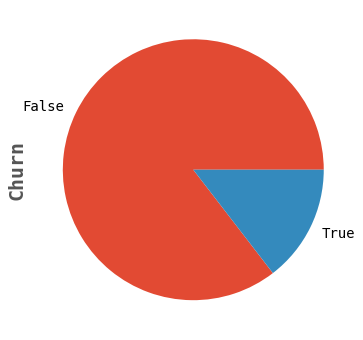

In [5]:
print(round(100*df['Churn'].value_counts(normalize=True)))
df['Churn'].value_counts().plot(kind='pie', figsize=(6,6));

## Median Value Comparison
<font size =3><br/> Median Value Comparison for Customers who **churned vs not churned**

**Analysis Summary:**
    
Looking at the median values of each feature and the percentage difference in median values for each category we find that Customers who churned:
- Made **twice** as much Customer service calls than those who didn't churn
- Had **20%** more Total Day Charge
- Made **25%** less international calls
    
**Observation:**<br/> 
Median values **_%Differences are same_** for the following pairs:
- Total day minutes and Total day charge
- Total eve minutes and Total eve charge
- Total night minutes and Total night charge
- Total int minutes and Total int charge
    
This suggests that minutes and charge columns are possibly strongly correlated. We will explore this more next when we look at correlations

<Figure size 576x576 with 0 Axes>

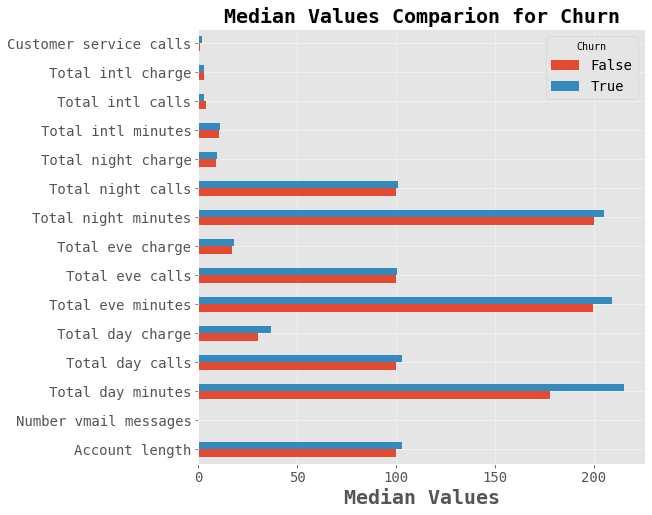

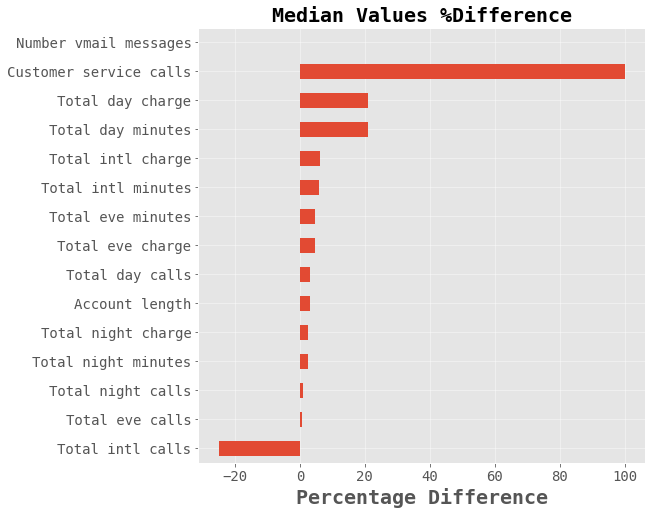

In [6]:
plt.figure();
df.groupby('Churn').median().transpose().plot(kind='barh');
plt.xlabel('Median Values')
plt.title('Median Values Comparion for Churn');

plt.figure();
median_stats = df.groupby('Churn').median().transpose()
median_stats['%Difference Median'] = 100*((median_stats[True]-median_stats[False])/(median_stats[False]))
median_stats.sort_values(by='%Difference Median', inplace=True)
median_stats['%Difference Median'].plot(kind='barh');
plt.xlabel('Percentage Difference')
plt.title('Median Values %Difference');

## Correlation Matrix

<font size =3>Correlation matrix for numerical features  
    
**Analysis Summary**
- **Call minutes** and **Call Charge** are strongly correlated with a correlation factor of 1.
- Dividing the **call charge** by **call minutes** gives the rate of call for each period.
    - Day charge = 0.17
    - Eve charge = 0.085
    - Night charge = 0.045
    - International charge = 0.27
- After feature engineering we will **drop all Call Charge columns** because these will be redundant in our analysis.

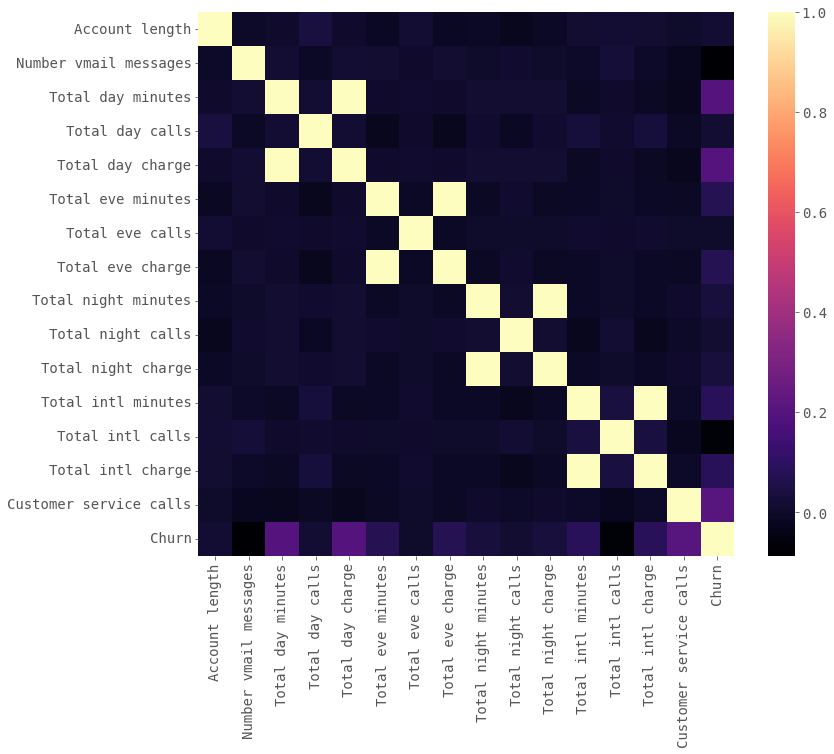

In [7]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='magma');

In [8]:
redundant_cols = ['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']

## Pairplots
<font size = 3>Seaborn pair plot for all features, colored by churn flag (True/False)

    
**Analysis Summary**

- Visual bivariate analysis suggests that **Customer service calls** and **Total day minutes** split the data much better as compared to other features
- This confirms what we saw before when we did median value analysis between two groups

<Figure size 1440x1440 with 0 Axes>

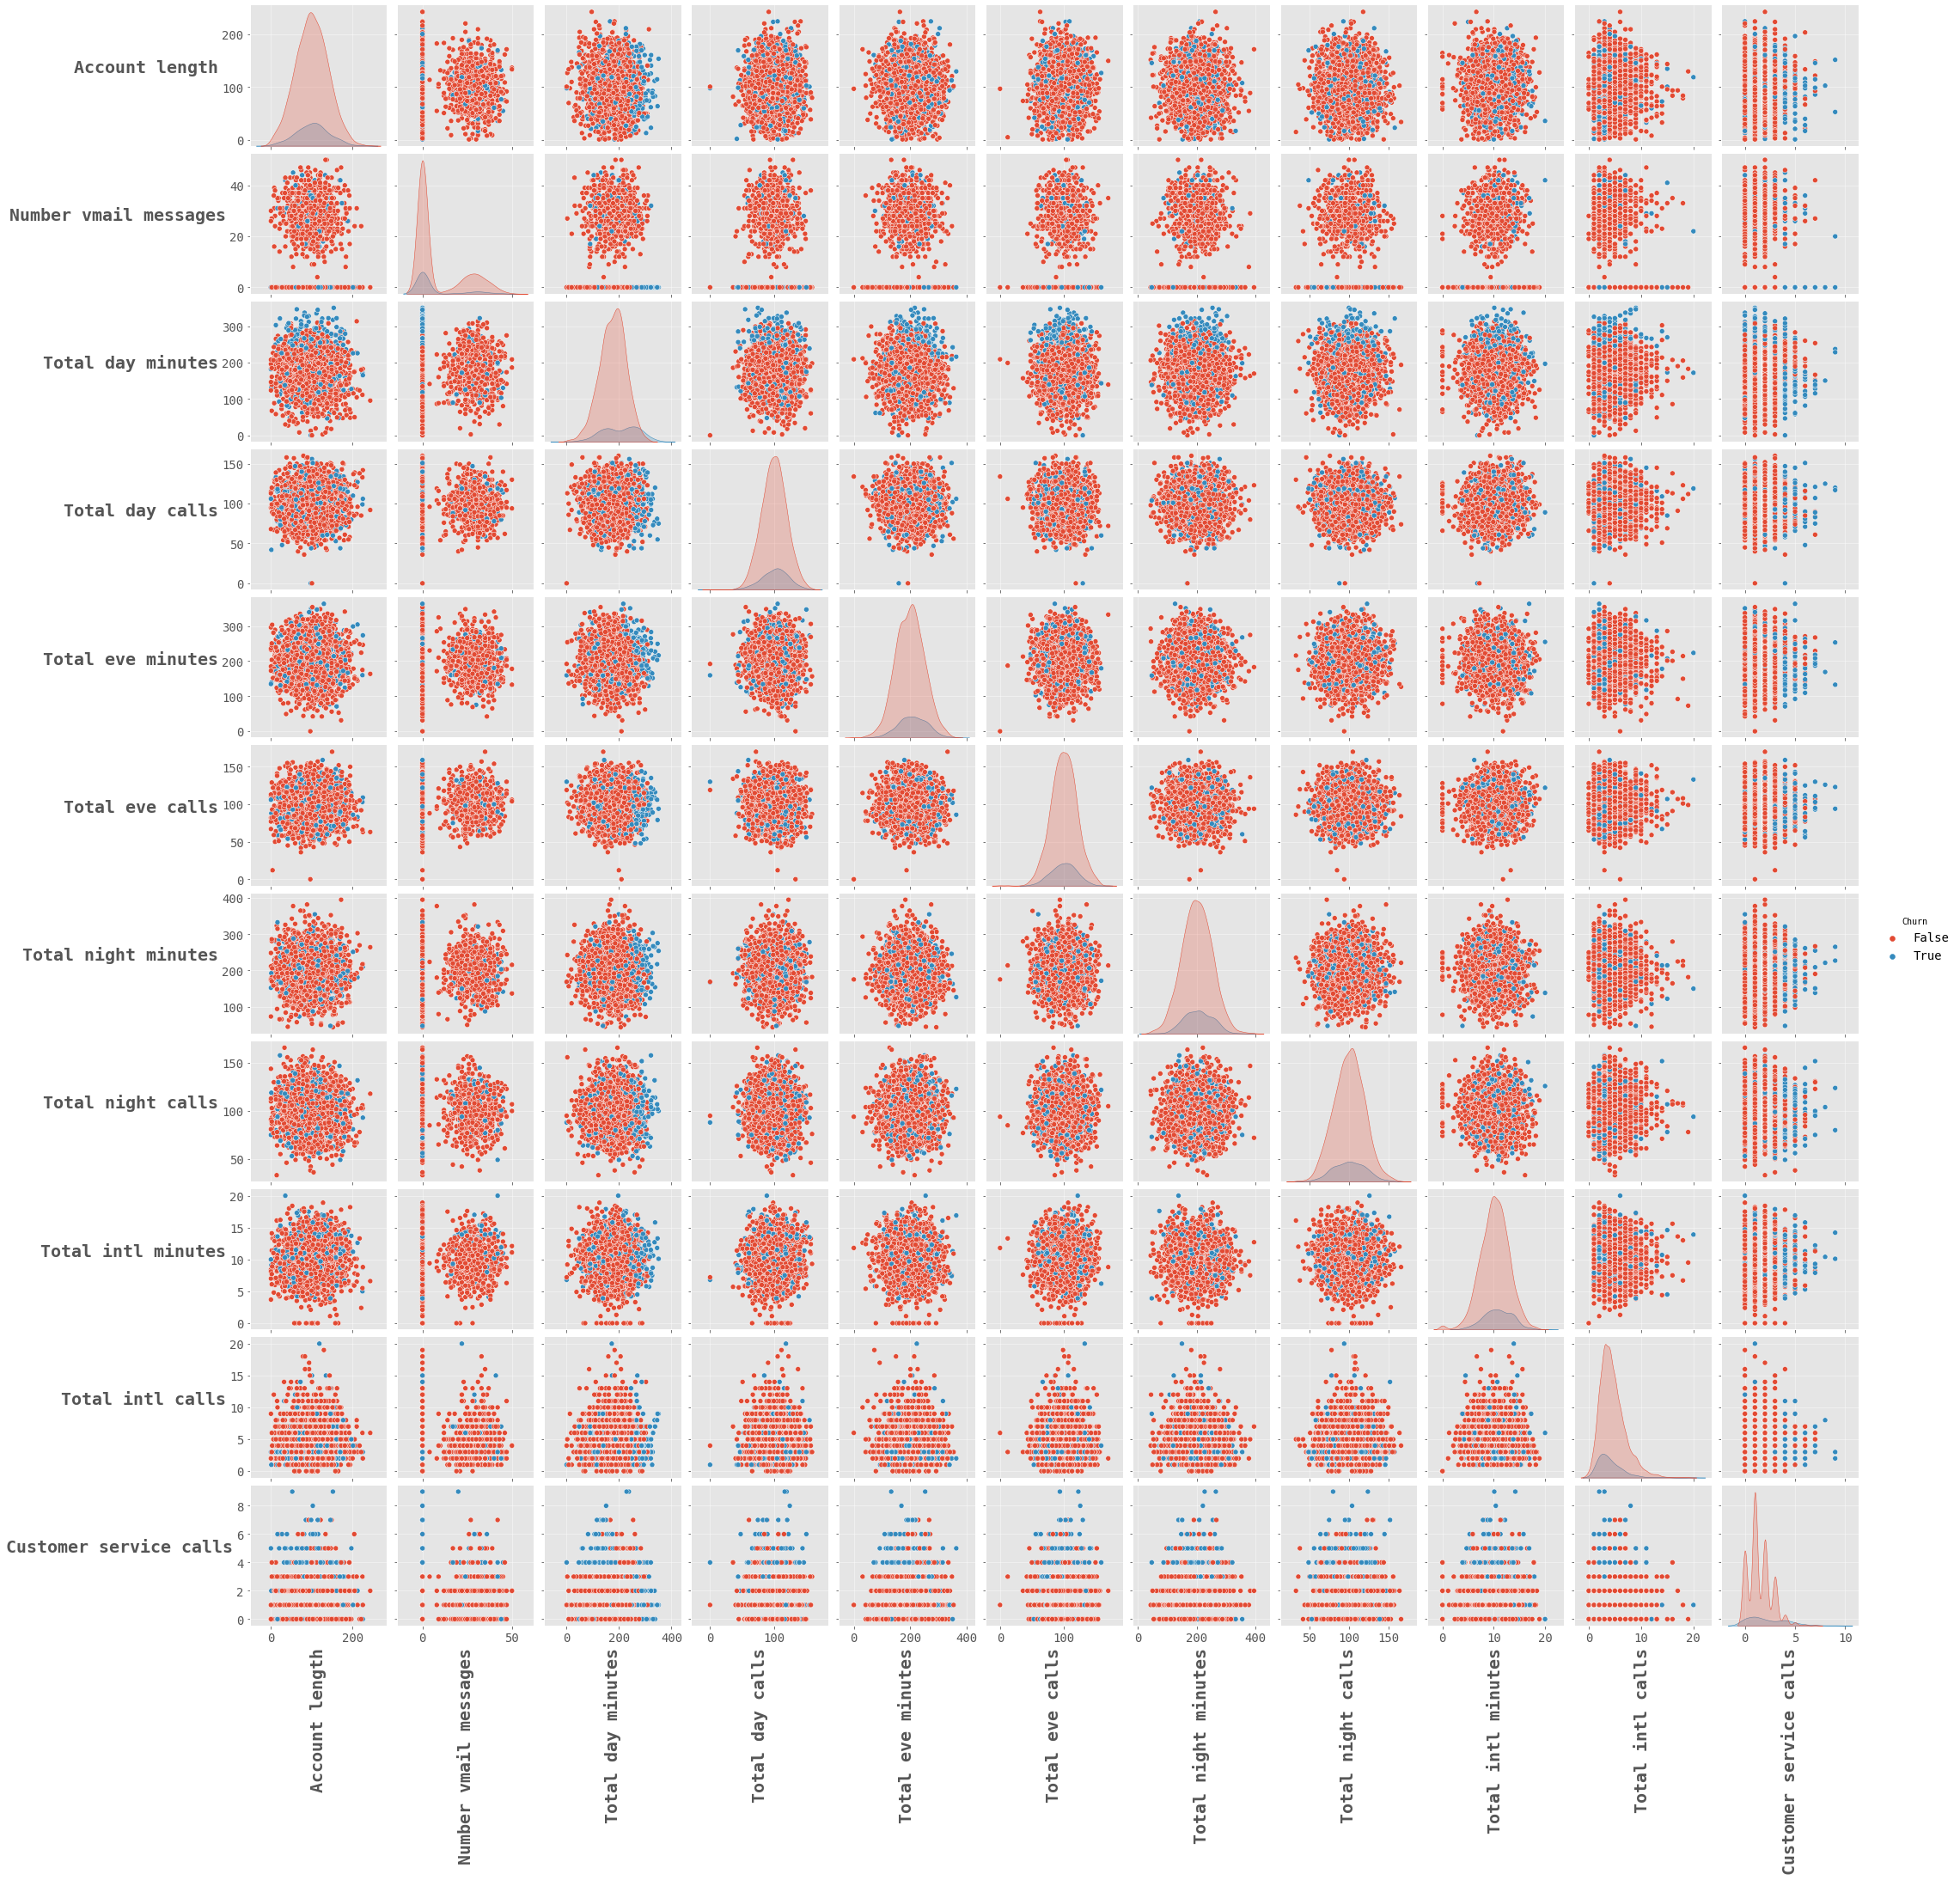

In [9]:
# Target column
target_col = 'Churn'

# Numberic columns
num_cols = ['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total eve minutes',
             'Total eve calls', 'Total night minutes', 'Total night calls', 'Total intl minutes', 'Total intl calls',
            'Customer service calls']

# All categorical columns
cat_cols = ['State', 'Area code', 'International plan', 'Voice mail plan']

# Make pair plot of numeric data
plt.figure(figsize=(20,20))
g = sns.pairplot(df[num_cols + ['Churn']], hue='Churn')
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

# Statistical Analysis

<font size=3>In this section we will perform a statistical analysis of the features, such as **T-Test** and **Chi2 Test**

## T-Test Theory
<font size=3>**Student's t-test**

The t-test is any statistical hypothesis test in which the test statistic follows a Student's t-distribution under the null hypothesis.

A t-test is most commonly applied when the test statistic would follow a normal distribution if the value of a scaling term in the test statistic were known. When the scaling term is unknown and is replaced by an estimate based on the data, the test statistics (under certain conditions) follow a Student's t distribution. The t-test can be used, for example, to determine if two sets of data are significantly different from each other.

more on student's t-test [wiki](https://en.wikipedia.org/wiki/Student%27s_t-test)

**What is the difference between an alpha level and a p-value?**

Assuming that the null hypothesis is true, this means we may reject the null only if the observed data are so unusual that they would have occurred by chance at most 5% of the time (alpha=0.05). The smaller the alpha, the more stringent the test (the more unlikely it is to find a statistically significant result). 

- Once the alpha level has been set, a statistic (like r) is computed. Each statistic has an associated probability value called a p-value, or the likelihood of an observed statistic occurring due to chance, given the sampling distribution.

- Alpha sets the standard for how extreme the data must be before we can reject the null hypothesis. The p-value indicates how extreme the data are. We compare the p-value with the alpha to determine whether the observed data are statistically significantly different from the null hypothesis:

    - If the p-value is less than or equal to the alpha (p< .05), then we reject the null hypothesis, and we say the result is statistically significant.
    - If the p-value is greater than alpha (p > .05), then we fail to reject the null hypothesis, and we say that the result is statistically nonsignificant (n.s.).
    
    
**<font size=4 color='green'>Perform T-Test to Compare Churn vs No Churn Groups against all numeric features</font>**

**Analysis Summary**

- P-value is the probability that the results from sample data occured by chance. 
- Low p-values are good, they indicate the data did not occur by chance. In most cases p-value of 0.05 is accepted to mean data is valid
- From the plot below **Total day minutes**, **Customer service calls**, **Number vmail messages**, **Total intl minutes**, **Total eve minutes**, **Total intl calls** are all statistically significant with p-values < 0.05

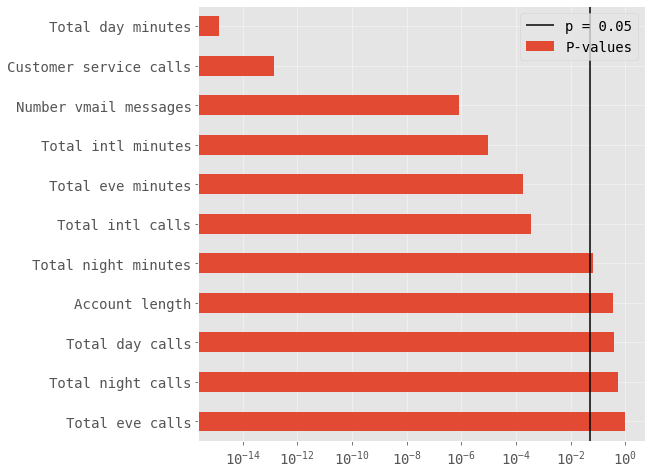

In [10]:
# Perform T-test for numerical columns against churn vs no-churn groups to check statistical significance
col_list = []
p_val_list = []

# Loop and calculate p-values for each feature
for col in num_cols:
    # Group 1 : Customers who churn
    true_col = df[df['Churn']==True][col]
    
    # Group 2 : Customers who did not churn
    false_col = df[df['Churn']==False][col]
    
    # Compute the t-stat and p-value
    t_stat, p_val = ttest_ind(true_col, false_col, equal_var=False)

    # Append p_values
    p_val_list.append(p_val)
    col_list.append(col)

# Plot p-values
# P-value is the probability that the results from sample data occured by chance. Low p-values are good, they 
# indicate the data did not occur by chance. Most cases p-value of 0.05 is accepted to mean data is valid
pvals = pd.DataFrame(p_val_list, col_list)
pvals.columns = ['P-values']
pvals.sort_values(by='P-values', ascending=False).plot(kind='barh');
plt.semilogx()
plt.vlines(x=0.05, ymin=-1, ymax=len(num_cols), colors='k', label='p = 0.05');
plt.legend();

## Chi2 Theory
<font size=3>**Chi2 Test**<br/>
    
A chi-square test is a statistical test used to compare observed results with expected results. The purpose of this test is to determine if a difference between observed data and expected data is due to chance, or if it is due to a relationship between the variables you are studying.Testing if the observed frequencies comply with the given frequencies

* Chisquared Distribution [wiki](https://en.wikipedia.org/wiki/Chi-squared_distribution)
    
**<font size=4 color='green'>Perform Chi2 to Compare Churn vs No Churn Groups against all categorical features</font>**

**Analysis Summary**
- From the plot below **International plan**, **Voice mail plan** and **State** are all statistically significant with p-values < 0.05

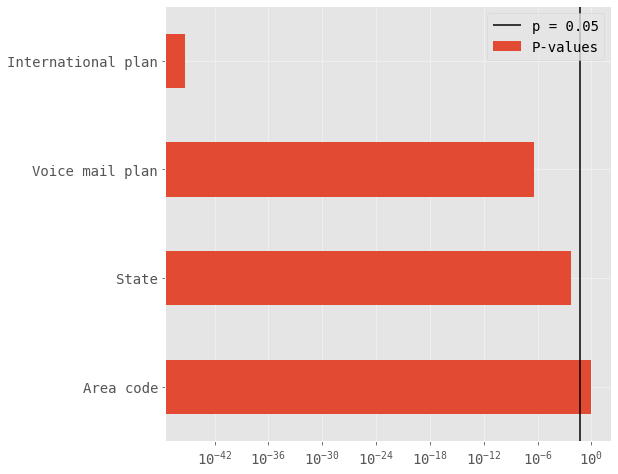

In [11]:
# Perform Chi2-test for categorical columns against churn vs no-churn groups to check statistical significance
col_list = []
p_val_list = []

# Loop and calculate p-values for each feature
for col in cat_cols:
    cross_tab = pd.crosstab(df[col], df['Churn'])
    
    # Compute the chi2-stat and p-value
    chi2_stat, p_val, dof,  exp_freq = chi2_contingency(observed=cross_tab)

    # Append p_values
    p_val_list.append(p_val)
    col_list.append(col)

# Plot p-values
# P-value is the probability that the results from sample data occured by chance. Low p-values are good, they 
# indicate the data did not occur by chance. Most cases p-value of 0.05 is accepted to mean data is valid
pvals = pd.DataFrame(p_val_list, col_list)
pvals.columns = ['P-values']
pvals.sort_values(by='P-values', ascending=False).plot(kind='barh');
plt.semilogx()
plt.vlines(x=0.05, ymin=-1, ymax=len(num_cols), colors='k', label='p = 0.05');
plt.legend();

# Machine Learning

<font size=3>
    
In this section we will
- Train and tune different machine learning algorithms including
    - **LogisticRegression**
    - **DecisionTrees**
    - **RandomForest**
    - **SupportVectorMachines**
    - **Xgboost**
    - **Adaboost** 
    - **MLPClassifier**
    - **KerasClassifier**
- Compare their performance
- Stack the tuned model together in an Ensemble of models

## Baseline Model 
**<font size=3 color=green>Model F1 Score:</font>** 0.12

In [12]:
# to supress warning for logistic regression model
import warnings
warnings.filterwarnings('ignore')

#--------------------------------------------------------------------------------------
# BaseLine Model
#--------------------------------------------------------------------------------------
base_line_model = 'LogisticRegression'

# List of Categoric and Numeric Features
categorical_features = list(df.select_dtypes('object').columns)
numeric_features = list(df.drop(columns = 'Churn').select_dtypes('number').columns)

features = categorical_features + numeric_features

# Define Features and Targets
X_train = df[features]
y_train = df['Churn']

X_test = df_test[features]
y_test = df_test['Churn']

# 
X_train = pd.get_dummies(X_train.fillna(0), drop_first=True)
X_test = pd.get_dummies(X_test.fillna(0), drop_first=True)

model = LogisticRegression()
model.fit(X_train, y_train)

# Fit Training Data
base_line_score = cross_val_score(model, X_train, y_train, cv = 5, scoring='f1').mean()
print('F1 Score Cross Validation:' , round(base_line_score, 2))

F1 Score Cross Validation: 0.12


## Feature Engineering

<font size=3>The feature engineering function contains all the pre-processing steps which we apply inside pipeline

In [13]:
class feature_engineering_steps(TransformerMixin):
    '''Funtion to perform all the pre-processing steps before running machine learning'''
    
    def fit(self, X, y=None):
        """The fit method doesn't do much here, 
           but it still required if your pipeline
           ever need to be fit. Just returns self."""
        return self

    def transform(self, X, y=None):
        """This is where the actual transformation occurs.
        """
        # Make a copy to avoid making changes inplace to original dataset
        pdf = X.copy()
        
        #--------------------------------------------------------------------
        # Correct data types
        #--------------------------------------------------------------------
        pdf['Area code'] = pdf['Area code'].astype('object')
        
        #--------------------------------------------------------------------
        # Create New Features
        #--------------------------------------------------------------------        
        # Account length features
        pdf['Account_length_bins'] = pd.qcut(pdf['Account length'], 4, labels= ['q1', 'q2', 'q3', 'q4'])
        pdf['Account_length_bins'] = pdf['Account_length_bins'].astype('object')
        
        # Voice mail messages
        pdf['zero_vmails'] = 'No'
        pdf.loc[pdf['Number vmail messages'] == 0 , 'zero_vmails'] = 'Yes'
        
        # Minutes and Number of calls related features
        pdf['Total_minutes'] = (pdf['Total day minutes'] + pdf['Total eve minutes'] + 
                                pdf['Total night minutes'] + pdf['Total intl minutes'])
        
        pdf['Total_calls'] = (pdf['Total day calls'] + pdf['Total eve calls'] + 
                                pdf['Total night calls'] + pdf['Total intl calls'])
        
        pdf['Minutes_per_call_overall'] = pdf['Total_minutes']/pdf['Total_calls']
        pdf['Minutes*call_overall'] = pdf['Total_minutes']*pdf['Total_calls']

        pdf['Minutes_per_call_int'] = pdf['Total intl minutes']/pdf['Total intl calls']
        pdf['Minutes_per_call_int'].fillna(0, inplace=True)
        pdf['Minutes*call_int'] = pdf['Total intl minutes']*pdf['Total intl calls']

        pdf['Minutes_per_call_day'] = pdf['Total day minutes']/pdf['Total day calls']
        pdf['Minutes_per_call_day'].fillna(0, inplace=True)
        pdf['Minutes*call_day'] = pdf['Total day minutes']*pdf['Total day calls']
 
        pdf['Minutes_per_call_eve'] = pdf['Total eve minutes']/pdf['Total eve calls']
        pdf['Minutes_per_call_eve'].fillna(0, inplace=True)
        pdf['Minutes*call_eve'] = pdf['Total eve minutes']*pdf['Total eve calls']

        pdf['Minutes_per_call_night'] = pdf['Total night minutes']/pdf['Total night calls']
        pdf['Minutes_per_call_night'].fillna(0, inplace=True)
        pdf['Minutes*call_night'] = pdf['Total night minutes']*pdf['Total night calls']
        
        # Total charge feature
        pdf['Total_charge'] = (pdf['Total day charge'] + pdf['Total eve charge'] +
                               pdf['Total night charge'] + pdf['Total intl charge'])
        
        # Customer service calls related features
        pdf['Day_minutes_per_customer_service_calls'] = pdf['Total day minutes']/pdf['Customer service calls']
        pdf['Day_minutes_per_customer_service_calls'].replace(np.inf, 0, inplace=True)
        pdf['Day_minutes*customer_service_calls'] = pdf['Total day minutes']*pdf['Customer service calls']
        
        pdf['Customer_service_calls_bins'] = pd.cut(pdf['Customer service calls'], 4, labels= ['q1', 'q2', 'q3', 'q4'])
        pdf['Customer_service_calls_bins'] = pdf['Customer_service_calls_bins'].astype('object')
        
        # Minutes features
        pdf['Total_day_minutes_wholenum'] = pdf['Total day minutes'].apply(lambda x:x//1)
        pdf['Total_day_minutes_decimalnum'] = pdf['Total day minutes'].apply(lambda x:x%1)
        
        pdf['Total_minutes_wholenum'] = pdf['Total_minutes'].apply(lambda x:x//1)
        pdf['Total_minutes_decimalnum'] = pdf['Total_minutes'].apply(lambda x:x%1)
        
        # Having both voice and international plan
        a = (pdf['International plan']=='Yes')
        b = (pdf['Voice mail plan']=='Yes')
        pdf['Voice_and_Int_plan'] = a&b
        pdf['Voice_and_Int_plan'].replace(True, 1, inplace=True)
        pdf['Voice_and_Int_plan'].replace(False, 1, inplace=True)
        
        # Having both voice and international plan
        a = (pdf['International plan']=='Yes')
        b = (pdf['Voice mail plan']=='Yes')
        pdf['Voice_and_Int_plan'] = a&b
        pdf['Voice_and_Int_plan'].replace(True, 1, inplace=True)
        pdf['Voice_and_Int_plan'].replace(False, 1, inplace=True)       
        
        # Having only international plan
        a = (pdf['International plan']=='Yes')
        b = (pdf['Voice mail plan']=='No')
        pdf['Only_Int_plan'] = a&b
        pdf['Only_Int_plan'].replace(True, 1, inplace=True)
        pdf['Only_Int_plan'].replace(False, 1, inplace=True)
        
        # Having only voice mail plan
        a = (pdf['International plan']=='No')
        b = (pdf['Voice mail plan']=='Yes')
        pdf['Only_vmail_plan'] = a&b
        pdf['Only_vmail_plan'].replace(True, 1, inplace=True)
        pdf['Only_vmail_plan'].replace(False, 1, inplace=True)

        # Having no plans
        a = (pdf['International plan']=='No')
        b = (pdf['Voice mail plan']=='No')
        pdf['No_plans'] = a&b
        pdf['No_plans'].replace(True, 1, inplace=True)
        pdf['No_plans'].replace(False, 1, inplace=True)
        
        #--------------------------------------------------------------------
        # Features to drop
        #--------------------------------------------------------------------        
        redundant_cols = ['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']
        feats_eng = []
        feats_still_to_eng = []
        leakage_feats = []
        target = ['Churn']
        
        return pdf.drop(columns= redundant_cols + feats_eng + feats_still_to_eng + leakage_feats + target)

# Run to make sure the function is performing all the steps
fe = feature_engineering_steps()
fe_df = fe.transform(df)
fe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 41 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   State                                   2666 non-null   object 
 1   Account length                          2666 non-null   int64  
 2   Area code                               2666 non-null   object 
 3   International plan                      2666 non-null   object 
 4   Voice mail plan                         2666 non-null   object 
 5   Number vmail messages                   2666 non-null   int64  
 6   Total day minutes                       2666 non-null   float64
 7   Total day calls                         2666 non-null   int64  
 8   Total eve minutes                       2666 non-null   float64
 9   Total eve calls                         2666 non-null   int64  
 10  Total night minutes                     2666 non-null   floa

In [14]:
#--------------------------------------------------------------------------------------
# Feature Selection
#--------------------------------------------------------------------------------------
# List of Categoric and Numeric Features
categorical_feats = list(fe_df.select_dtypes('object').columns)
numeric_feats = list(fe_df.select_dtypes('number').columns)

# Define Features and Targets
# Training data
X_train = df
y_train = df['Churn']

# Testing data
X_test = df_test
y_test = df_test['Churn']

#--------------------------------------------------------------------------------------
# Column Transformer Section
#--------------------------------------------------------------------------------------
# Combine All Numeric and Categoric Pipelines in Column Transformer. Steps: Scaling => Ohe
preprocessor = ColumnTransformer([ 
                                  ('scaler',  MinMaxScaler(), numeric_feats),
                                  ('ohe',  OneHotEncoder(handle_unknown='ignore'), categorical_feats)
                                 ])

## Logistic Regression Model
**<font size=3 color=green>Model F1 Score:</font>** 0.54

In [15]:
# Make Pipelines
pipe = Pipeline([
                ('feature_engineering', feature_engineering_steps()),
                ('preprocessor', preprocessor),
                ('ros', RandomOverSampler(random_state=42)),
                ('classifier',  LogisticRegression())
                ])

# Hyper Parameter Tuning
parameters = {
     'classifier__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
     'classifier__penalty' : ['l1','l2'],
     'classifier__C' : np.logspace(-3,3,7)
        }

# Define grid search
gs = GridSearchCV(pipe, parameters, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Train grid search
gs.fit(X_train, y_train)
print('F1 Score Cross Validation:' , round(gs.best_score_, 2))

# Make grid search summary table
lr_model_stats = pd.DataFrame(gs.cv_results_)
lr_model_stats = lr_model_stats.sort_values(by='rank_test_score', ascending=False).reset_index()

# Predict on test data
lr_model = gs.best_estimator_
lr_train_score = round(f1_score(y_train, lr_model.predict(X_train)), 2)
lr_test_score = round(f1_score(y_test, lr_model.predict(X_test)), 2)
print('F1 Score Train:' , lr_train_score) 
print('F1 Score Test:' , lr_test_score)
print(classification_report(y_test, lr_model.predict(X_test)))

Fitting 5 folds for each of 70 candidates, totalling 350 fits
F1 Score Cross Validation: 0.52
F1 Score Train: 0.57
F1 Score Test: 0.54
              precision    recall  f1-score   support

       False       0.96      0.81      0.88       572
        True       0.41      0.79      0.54        95

    accuracy                           0.81       667
   macro avg       0.68      0.80      0.71       667
weighted avg       0.88      0.81      0.83       667



## Decision Tree Model
**<font size=3 color=green>Model F1 Score:</font>** 0.92

In [16]:
# Make Pipelines
pipe = Pipeline([
                ('feature_engineering', feature_engineering_steps()),
                ('preprocessor', preprocessor),
                ('ros', RandomOverSampler(random_state=42)),
                ('classifier',  DecisionTreeClassifier(random_state=42)) 
                ])

# Hyper Parameter Tuning
parameters = {
     'classifier__criterion' : ['gini', 'entropy'],
     'classifier__max_depth' : [2,4,6,8,10,12],
     'classifier__min_samples_leaf': range(1,5)
        }

# Define grid search
gs = GridSearchCV(pipe, parameters, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Train grid search
gs.fit(X_train, y_train)
print('F1 Score Cross Validation:' , round(gs.best_score_, 2))

# Make grid search summary table
dt_model_stats = pd.DataFrame(gs.cv_results_)
dt_model_stats = dt_model_stats.sort_values(by='rank_test_score', ascending=False).reset_index()

# Refit and Predict on test data
dt_model = gs.best_estimator_
dt_train_score = round(f1_score(y_train, dt_model.predict(X_train)), 2)
dt_test_score = round(f1_score(y_test, dt_model.predict(X_test)), 2)
print('F1 Score Train:' , dt_train_score) 
print('F1 Score Test:' , dt_test_score)
print(classification_report(y_test, dt_model.predict(X_test)))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
F1 Score Cross Validation: 0.89
F1 Score Train: 0.92
F1 Score Test: 0.92
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       572
        True       0.98      0.87      0.92        95

    accuracy                           0.98       667
   macro avg       0.98      0.94      0.96       667
weighted avg       0.98      0.98      0.98       667



## Random Forest
**<font size=3 color=green>Model F1 Score:</font>** 0.93

In [17]:
# Make Pipelines
pipe = Pipeline([
                ('feature_engineering', feature_engineering_steps()),
                ('preprocessor', preprocessor),
                ('ros', RandomOverSampler(random_state=42)),
                ('classifier',  RandomForestClassifier(random_state=42)) 
                ])

# Hyper Parameter Tuning
parameters = {
     'classifier__n_estimators' : [10,50,100,500],
     'classifier__criterion' : ['gini', 'entropy'],
     'classifier__max_depth' : [2,4,6,8,10,12],
     'classifier__min_samples_leaf': range(1,5)
        }

# Define grid search
gs = GridSearchCV(pipe, parameters, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Train grid search
gs.fit(X_train, y_train)
print('F1 Score Cross Validation:' , round(gs.best_score_, 2))

# Make grid search summary table
rf_model_stats = pd.DataFrame(gs.cv_results_)
rf_model_stats = rf_model_stats.sort_values(by='rank_test_score', ascending=False).reset_index()

# Refit and Predict on test data
rf_model = gs.best_estimator_
rf_train_score = round(f1_score(y_train, rf_model.predict(X_train)), 2)
rf_test_score = round(f1_score(y_test, rf_model.predict(X_test)), 2)
print('F1 Score Train:' , rf_train_score) 
print('F1 Score Test:' , rf_test_score)
print(classification_report(y_test, rf_model.predict(X_test)))

Fitting 5 folds for each of 192 candidates, totalling 960 fits
F1 Score Cross Validation: 0.89
F1 Score Train: 0.96
F1 Score Test: 0.93
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       572
        True       0.99      0.87      0.93        95

    accuracy                           0.98       667
   macro avg       0.98      0.94      0.96       667
weighted avg       0.98      0.98      0.98       667



## SVM
**<font size=3 color=green>Model F1 Score:</font>** 0.59

In [24]:
import warnings
warnings.filterwarnings('ignore')

# Make Pipelines
pipe = Pipeline([
                ('feature_engineering', feature_engineering_steps()),
                ('preprocessor', preprocessor),
                ('ros', SMOTE(random_state=42)),
                ('classifier',  SVC(random_state=42)) 
                ])

# Hyper Parameter Tuning
parameters = {
     'classifier__kernel' : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
     'classifier__C' : [0.1, 1, 10],
     'classifier__gamma' : ['scale', 'auto']
        }

# Define grid search
gs = GridSearchCV(pipe, parameters, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Train grid search
gs.fit(X_train, y_train)
print('F1 Score Cross Validation:' , round(gs.best_score_, 2))

# Make grid search summary table
svm_model_stats = pd.DataFrame(gs.cv_results_)
svm_model_stats = svm_model_stats.sort_values(by='rank_test_score', ascending=False).reset_index()

# Refit and Predict on test data
svm_model = gs.best_estimator_
svm_train_score = round(f1_score(y_train, svm_model.predict(X_train)), 2)
svm_test_score = round(f1_score(y_test, svm_model.predict(X_test)), 2)
print('F1 Score Train:' , svm_train_score) 
print('F1 Score Test:' , svm_test_score)
print(classification_report(y_test, svm_model.predict(X_test)))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
F1 Score Cross Validation: 0.55
F1 Score Train: 0.73
F1 Score Test: 0.59
              precision    recall  f1-score   support

       False       0.95      0.87      0.91       572
        True       0.49      0.75      0.59        95

    accuracy                           0.85       667
   macro avg       0.72      0.81      0.75       667
weighted avg       0.89      0.85      0.87       667



## XGB Classifier
**<font size=3 color=green>Model F1 Score:</font>** 0.92

In [18]:
# Make Pipelines
pipe = Pipeline([
                ('feature_engineering', feature_engineering_steps()),
                ('preprocessor', preprocessor),
                ('ros', RandomOverSampler(random_state=42)),
                ('classifier',  XGBClassifier(eval_metric = 'logloss', random_state=42, use_label_encoder=False)) 
                ])

# Hyper Parameter Tuning
parameters = {
        'classifier__n_estimators': [50, 100],    
        'classifier__min_child_weight': [0.1, 1, 10],
        'classifier__gamma': [0.5, 1, 2],
#         'classifier__subsample': [0.8, 1.0, 2],
#         'classifier__colsample_bytree': [0.6, 0.8, 1.0],
        'classifier__max_depth': [3, 6, 8, 12]
        }

# Define grid search
gs = GridSearchCV(pipe, parameters, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Train grid search
gs.fit(X_train, y_train)
print('F1 Score Cross Validation:' , round(gs.best_score_, 2))

# Make grid search summary table
xgb_model_stats = pd.DataFrame(gs.cv_results_)
xgb_model_stats = xgb_model_stats.sort_values(by='rank_test_score', ascending=False).reset_index()

# Refit and Predict on test data
xgb_model = gs.best_estimator_
xgb_train_score = round(f1_score(y_train, xgb_model.predict(X_train)), 2)
xgb_test_score = round(f1_score(y_test, xgb_model.predict(X_test)), 2)
print('F1 Score Train:' , xgb_train_score) 
print('F1 Score Test:' , xgb_test_score)
print(classification_report(y_test, xgb_model.predict(X_test)))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
F1 Score Cross Validation: 0.92
F1 Score Train: 1.0
F1 Score Test: 0.92
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       572
        True       0.98      0.87      0.92        95

    accuracy                           0.98       667
   macro avg       0.98      0.94      0.96       667
weighted avg       0.98      0.98      0.98       667



## Adaboost Classifier
**<font size=3 color=green>Model F1 Score:</font>** 0.93

In [19]:
# Make Pipelines
DTC = DecisionTreeClassifier(random_state = 42)
pipe = Pipeline([
                ('feature_engineering', feature_engineering_steps()),
                ('preprocessor', preprocessor),
                ('classifier',  AdaBoostClassifier(base_estimator=DTC, random_state=42)) 
                ])

# Hyper Parameter Tuning
parameters = {
        'classifier__base_estimator__max_depth': [2, 4, 6, 8, 10,12],
        'classifier__base_estimator__min_samples_leaf':range(1,5),
        'classifier__n_estimators':[50,100,500],
        'classifier__learning_rate':[0.01,0.1]
}

# Define grid search
gs = GridSearchCV(pipe, parameters, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Train grid search
gs.fit(X_train, y_train)
print('F1 Score Cross Validation:' , round(gs.best_score_, 2))

# Make grid search summary table
adab_model_stats = pd.DataFrame(gs.cv_results_)
adab_model_stats = adab_model_stats.sort_values(by='rank_test_score', ascending=False).reset_index()

# Refit and Predict on test data
adab_model = gs.best_estimator_
adab_train_score = round(f1_score(y_train, adab_model.predict(X_train)), 2)
adab_test_score = round(f1_score(y_test, adab_model.predict(X_test)), 2)
print('F1 Score Train:' , adab_train_score) 
print('F1 Score Test:' , adab_test_score)
print(classification_report(y_test, adab_model.predict(X_test)))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
F1 Score Cross Validation: 0.92
F1 Score Train: 0.93
F1 Score Test: 0.93
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       572
        True       0.99      0.87      0.93        95

    accuracy                           0.98       667
   macro avg       0.98      0.94      0.96       667
weighted avg       0.98      0.98      0.98       667



## Neural Networks - Multi-Layer Perceptron
**<font size=3 color=green>Model F1 Score:</font>** 0.62

In [25]:
from sklearn.neural_network import MLPClassifier

# Make Pipelines
pipe = Pipeline([
                ('feature_engineering', feature_engineering_steps()),
                ('preprocessor', preprocessor),
                ('classifier',  MLPClassifier(random_state=42)) 
                ])

# Hyper Parameter Tuning
parameters = {
        'classifier__hidden_layer_sizes': [(10,5), (10,5,3), (50,20), (100,)],
        'classifier__activation' :  ['relu', 'tanh'],
        'classifier__solver':['sgd','adam','lbfgs']
}

# Define grid search
gs = GridSearchCV(pipe, parameters, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Train grid search
gs.fit(X_train, y_train)
print('F1 Score Cross Validation:' , round(gs.best_score_, 2))

# Make grid search summary table
nn_model_stats = pd.DataFrame(gs.cv_results_)
nn_model_stats = nn_model_stats.sort_values(by='rank_test_score', ascending=False).reset_index()

# Refit and Predict on test data
nn_model = gs.best_estimator_
nn_train_score = round(f1_score(y_train, nn_model.predict(X_train)), 2)
nn_test_score = round(f1_score(y_test, nn_model.predict(X_test)), 2)
print('F1 Score Train:' , nn_train_score) 
print('F1 Score Test:' , nn_test_score)
print(classification_report(y_test, nn_model.predict(X_test)))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
F1 Score Cross Validation: 0.61
F1 Score Train: 0.89
F1 Score Test: 0.68
              precision    recall  f1-score   support

       False       0.95      0.95      0.95       572
        True       0.68      0.67      0.68        95

    accuracy                           0.91       667
   macro avg       0.81      0.81      0.81       667
weighted avg       0.91      0.91      0.91       667



## Neural Networks - Keras
**<font size=3 color=green>Model F1 Score:</font>** 0.46

In [21]:
# prepare input data
def prepare_inputs(X_train, X_test):
    ohe = OneHotEncoder(handle_unknown='ignore')
    ohe.fit(X_train)
    X_train_enc = ohe.transform(X_train)
    X_test_enc = ohe.transform(X_test)
    return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc


# prepare input data
X_train_enc, X_test_enc = prepare_inputs(fe.transform(X_train), fe.transform(X_test))

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# Create Keras model
def create_model(activation = 'relu', optimizer = 'sgd', dropout_rate = 0):
    # Define the models
    model = Sequential()
    model.add(Dense(100, input_dim=X_train_enc.shape[1], activation='relu' ))
    model.add(Dropout(dropout_rate))
    
    model.add(Dense(50, activation=activation))
    model.add(Dropout(dropout_rate))
   
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the keras model
    model.compile(loss='binary_crossentropy', optimizer= optimizer , metrics=['accuracy'])

    return model

In [22]:
# Make Pipelines
pipe = Pipeline([
                ('ros', RandomOverSampler(random_state=42)),
                ('classifier',  KerasClassifier(build_fn=create_model)) 
                ])

# Hyper Parameter Tuning
parameters = {
#         'classifier__batch_size': [10, 50, 100],
        'classifier__epochs':[20, 30],
        'classifier__dropout_rate': [0.2, 0.5, 0.8],
        'classifier__activation' :  ['relu', 'tanh']
            }
gs = GridSearchCV(pipe, parameters, cv=2, scoring='f1', verbose=1)

# Train grid search
gs.fit(X_train_enc, y_train_enc)
# summarize results
print('F1 Score Cross Validation:' , round(gs.best_score_, 2))

# Make grid search summary table
keras_model_stats = pd.DataFrame(gs.cv_results_)
keras_model_stats = keras_model_stats.sort_values(by='rank_test_score', ascending=False).reset_index()

# Refit and Predict on test data
keras_model = gs.best_estimator_
keras_train_score = round(f1_score(y_train_enc, keras_model.predict(X_train_enc)), 2)
keras_test_score = round(f1_score(y_test_enc, keras_model.predict(X_test_enc)), 2)
print('F1 Score Train:' , keras_train_score) 
print('F1 Score Test:' , keras_test_score)
print(classification_report(y_test_enc, keras_model.predict(X_test_enc)))

Fitting 2 folds for each of 12 candidates, totalling 24 fits


2022-04-19 18:50:41.376150: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/20


2022-04-19 18:50:42.065678: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


70/70 [==============================] - 1s 3ms/step - loss: 0.6904 - accuracy: 0.5680
Epoch 2/20
70/70 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.6608
Epoch 3/20
70/70 [==============================] - 0s 3ms/step - loss: 0.6701 - accuracy: 0.7131
Epoch 4/20
70/70 [==============================] - 0s 3ms/step - loss: 0.6532 - accuracy: 0.7568
Epoch 5/20
70/70 [==============================] - 0s 3ms/step - loss: 0.6319 - accuracy: 0.7698
Epoch 6/20
70/70 [==============================] - 0s 4ms/step - loss: 0.6088 - accuracy: 0.7919
Epoch 7/20
70/70 [==============================] - 0s 5ms/step - loss: 0.5823 - accuracy: 0.8131
Epoch 8/20
70/70 [==============================] - 0s 4ms/step - loss: 0.5510 - accuracy: 0.8270
Epoch 9/20
70/70 [==============================] - 0s 3ms/step - loss: 0.5178 - accuracy: 0.8428
Epoch 10/20
70/70 [==============================] - 0s 3ms/step - loss: 0.4831 - accuracy: 0.8644
Epoch 11/20
70/70 [===========

# Model Ensembles

## Model Performance Comparison
<font size=3> Plot sorted Mean Test F1-Scores and respective Standard Deviations of all trained models

**Analysis:**<br/>
- Tree based models out perform all other models.
- Perceptron based models such as LogisticRegression, and Neural Networks (MLPClassifier, Keras) do not perform as good.

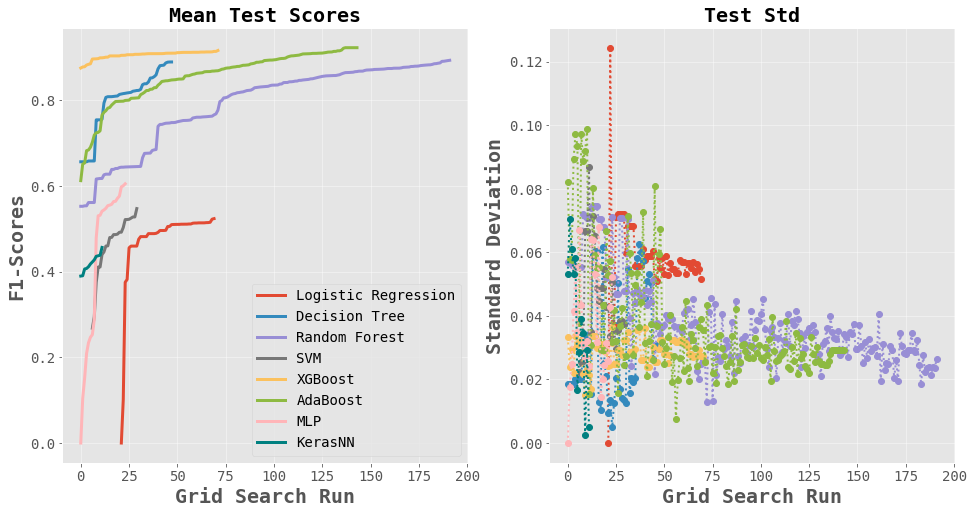

In [26]:
plt.figure(figsize=(16,8))

# Test Scores Plot
plt.subplot(1,2,1)
pd.Series(lr_model_stats['mean_test_score']).plot(kind='line', lw=3,label = 'Logistic Regression');
pd.Series(dt_model_stats['mean_test_score']).plot(kind='line', lw=3,label = 'Decision Tree');
pd.Series(rf_model_stats['mean_test_score']).plot(kind='line', lw=3,label = 'Random Forest');
pd.Series(svm_model_stats['mean_test_score']).plot(kind='line', lw=3,label = 'SVM');
pd.Series(xgb_model_stats['mean_test_score']).plot(kind='line', lw=3,label = 'XGBoost');
pd.Series(adab_model_stats['mean_test_score']).plot(kind='line', lw=3, label = 'AdaBoost');
pd.Series(nn_model_stats['mean_test_score']).plot(kind='line', lw=3, label = 'MLP');
pd.Series(keras_model_stats['mean_test_score']).plot(kind='line', lw=3, label = 'KerasNN', color='teal');
plt.title('Mean Test Scores')
plt.xlabel('Grid Search Run')
plt.ylabel('F1-Scores')
plt.legend()

# Test Scores Standard Deviation Plot
plt.subplot(1,2,2)
pd.Series(lr_model_stats['std_test_score']).plot(kind='line', lw=2, ls=':', marker='o', label = 'Logistic Regression');
pd.Series(dt_model_stats['std_test_score']).plot(kind='line', lw=2, ls=':', marker='o',label = 'Decision Tree');
pd.Series(rf_model_stats['std_test_score']).plot(kind='line', lw=2, ls=':', marker='o',label = 'Random Forest');
pd.Series(svm_model_stats['std_test_score']).plot(kind='line', lw=2, ls=':', marker='o',label = 'SVM');
pd.Series(xgb_model_stats['std_test_score']).plot(kind='line', lw=2, ls=':', marker='o',label = 'XGBoost');
pd.Series(adab_model_stats['std_test_score']).plot(kind='line', lw=2, ls=':', marker='o', label = 'AdaBoost');
pd.Series(nn_model_stats['std_test_score']).plot(kind='line', lw=2, ls=':', marker='o', label = 'MLP');
pd.Series(keras_model_stats['std_test_score']).plot(kind='line', lw=2, ls=':', marker='o', label = 'KerasNN', color='teal');
plt.title('Test Std')
plt.xlabel('Grid Search Run')
plt.ylabel('Standard Deviation')
plt.tight_layout;

In [ ]:
# Save Pipeline models
# joblib.dump(lr_model, 'lr.pkl')
# joblib.dump(dt_model, 'dt.pkl')
# joblib.dump(rf_model, 'rf.pkl')
# joblib.dump(svm_model, 'svm.pkl')
# joblib.dump(xgb_model, 'xgb.pkl')
# joblib.dump(adab_model, 'adab.pkl');
# joblib.dump(nn_model, 'nn.pkl');
# joblib.dump(keras_model, 'keras.pkl');

## Model Ensemble - Voting Classifier
<font size=3>Model ensemble through voting classifiers. Based on model performance results we ensemble the following 4 models:
- **DecisionTrees**
- **RandomForest**
- **XGboost**
- **Adaboost**

**<font size=3 color=green>Model F1 Score:</font>** 0.93

In [27]:
# Define estimator
estimators =  [
                ('dt', dt_model), ('rf', rf_model),
                ('xgb', xgb_model), ('ada', adab_model)
            ]
# Vote
vc = VotingClassifier(estimators=estimators)

# Fit Training Data
vc_scores = cross_val_score(vc, X_train, y_train, cv=5, scoring='f1').mean()
print('F1 Score Cross Validation:' , round(vc_scores, 2))

# Refit and Predict on test data
vc_model = vc.fit(X_train, y_train)
vc_train_score = round(f1_score(y_train, vc_model.predict(X_train)), 2)
vc_test_score = round(f1_score(y_test, vc_model.predict(X_test)), 2)
print('F1 Score Train:' , vc_train_score) 
print('F1 Score Test:' , vc_test_score)
print(classification_report(y_test, vc_model.predict(X_test)))

F1 Score Cross Validation: 0.92
F1 Score Train: 0.93
F1 Score Test: 0.93
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       572
        True       1.00      0.87      0.93        95

    accuracy                           0.98       667
   macro avg       0.99      0.94      0.96       667
weighted avg       0.98      0.98      0.98       667



## Model Ensemble - Stacking Classifier
<font size=3>Model ensemble through stacking classifiers. We will use the same 4 models as above
    
**<font size=3 color=green>Model F1 Score:</font>** 0.93

In [29]:
import warnings
warnings.filterwarnings('ignore')

# Define estimator
estimators =  [
                ('dt', dt_model), ('rf', rf_model),
                ('xgb', xgb_model), ('ada', adab_model)
            ]

# Final Stacking
sc = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression())

# Fit Training Data
sc_scores = cross_val_score(sc, X_train, y_train, cv=5, scoring='f1').mean()
print('F1 Score Cross Validation:' , round(sc_scores, 2))

# Refit and Predict on test data
sc_model = sc.fit(X_train, y_train)
sc_train_score = round(f1_score(y_train, sc_model.predict(X_train)), 2)
sc_test_score = round(f1_score(y_test, sc_model.predict(X_test)), 2)
print('F1 Score Train:' , sc_train_score)
print('F1 Score Test:' , sc_test_score)
print(classification_report(y_test, sc_model.predict(X_test)))

F1 Score Cross Validation: 0.92
F1 Score Train: 0.93
F1 Score Test: 0.93
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       572
        True       1.00      0.87      0.93        95

    accuracy                           0.98       667
   macro avg       0.99      0.94      0.96       667
weighted avg       0.98      0.98      0.98       667



# PCA

<font size=3> Principal component analysis (PCA) is a technique for reducing the dimensionality of large datasets, increasing interpretability but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance. Finding such new variables, the principal components, reduces to solving an eigenvalue/eigenvector problem, and the new variables are defined by the dataset at hand, not a priori, hence making PCA an adaptive data analysis technique. 

## Model Score vs number of Principal Components
<font size=3>In this section we will train the model by increasing the number of principal components, one at a time and check the model scores in outcome

**Analysis Summary**
- We used Decision Tree to score and only used numerical columns for analysis
- There is a jump is scores at **8** Principal Components(PC), after the Score trend stays flat

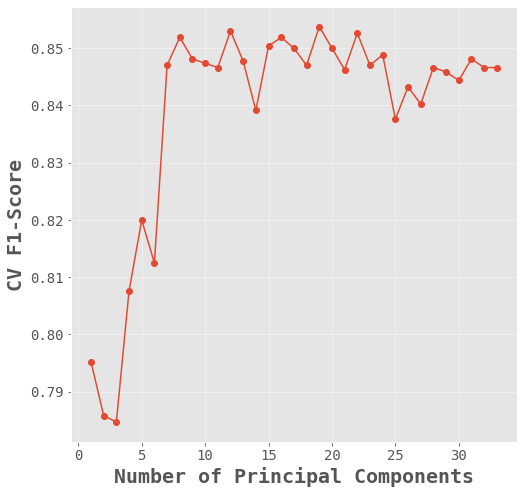

In [30]:
# Run feature engineering function
fe1 = feature_engineering_steps()
fe_df1 = fe1.transform(df)
numeric_feats = list(fe_df1.select_dtypes('number').columns)

# Numerical training data
X_train = fe_df1[numeric_feats]

# Scale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
y_train = df['Churn']

# Change number of PCA and append scores
scores = []
for i in range(1,len(X_train.columns)):
    pca = PCA(i)
    X_train_scaled_PCA = pca.fit_transform(X_train_scaled) 
    scores.append(cross_val_score(DecisionTreeClassifier(), X_train_scaled_PCA, y_train).mean())
    
# plot scores
plt.figure()
plt.plot(range(1,len(X_train.columns)), scores, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('CV F1-Score');

## Explained variance plot

<font size=3> The explained variance plot shows that almost all the variance in the dataset(containing **33** features) could be explained by **15** PC. 

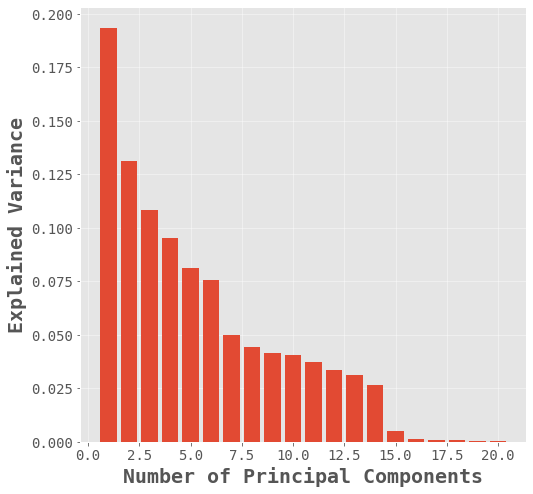

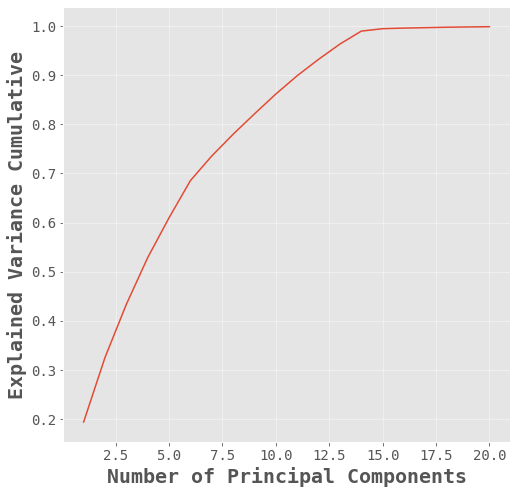

In [31]:
num_pca = 20
pca = PCA(num_pca)
X_train_scaled_PCA = pca.fit_transform(X_train_scaled) 

plt.figure();
plt.bar(np.arange(1,num_pca+1), pca.explained_variance_ratio_)
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance');

plt.figure();
plt.plot(np.arange(1,num_pca+1), pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Cumulative');

## PCA plots
<font size = 3> Now we will try to visualize the the **top 2** and **top 3** PC in 2D and 3D plots respectively
    
**Analysis Summary**
- From the plots below we see that there is some level of difference between the two groups (Churn vs Not Churn) but it is not a good separation.
- Generally, customers who churn tend to have higher value in PC1
- Like discussed before we need more Principal Components to completely separate the two groups. 

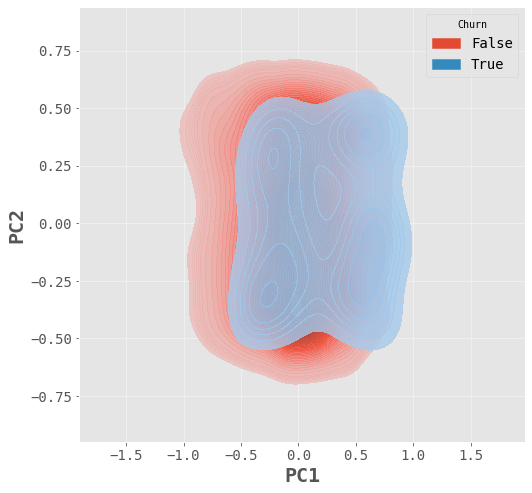

In [32]:
pca = PCA(2)
X_train_scaled_PCA = pca.fit_transform(X_train_scaled) 

pc2_df = pd.DataFrame(X_train_scaled_PCA, columns=['PC1', 'PC2'])
pc2_df['Churn'] = y_train.values
pc2_df.head(3)

# plot
# colors = {True:'tab:blue', False:'tab:orange'}
# pc2_df.plot(kind='scatter', x='PC1', y='PC2', c=pc2_df['Churn'].map(colors));
sns.kdeplot(x='PC1', y='PC2', data=pc2_df, shade='fill', hue='Churn' , cut=3, levels=50, alpha=0.8);

In [33]:
pca = PCA(3)
X_train_scaled_PCA = pca.fit_transform(X_train_scaled)
pc3_df = pd.DataFrame(X_train_scaled_PCA, columns=['PC1', 'PC2', 'PC3'])
pc3_df['Churn'] = y_train.values

# plot
fig = px.scatter_3d(pc3_df, x='PC1', y='PC2', z='PC3', color='Churn')
fig.update_traces(marker_size = 4)
fig.show()


# Explain Model

## Define Functions to extract feature names from pipeline
<font size=3>Since we ran our feature engineering and one hot encoding inside the pipeline we will first need to extract the feature names from the pipe line to do this we used the **get_ct_feature_names** and **get_feature_out** functions defined below

In [34]:
def get_feature_out(estimator, feature_in):

    if hasattr(estimator,'get_feature_names'):
        if isinstance(estimator, _VectorizerMixin):
            # handling all vectorizers
            return [f'vec_{f}' \
                for f in estimator.get_feature_names()]
        else:
            return estimator.get_feature_names(feature_in)
        
    elif isinstance(estimator, SelectorMixin):
        return np.array(feature_in)[estimator.get_support()]
    
    else:
        return feature_in


def get_ct_feature_names(ct):
    # handles all estimators, pipelines inside ColumnTransfomer
    # doesn't work when remainder =='passthrough'
    # which requires the input column names.
    output_features = []

    for name, estimator, features in ct.transformers_:
        if name!='remainder':
            if isinstance(estimator, Pipeline):
                current_features = features
                for step in estimator:
                    current_features = get_feature_out(step, current_features)
                features_out = current_features
            else:
                features_out = get_feature_out(estimator, features)
            output_features.extend(features_out)
        elif estimator=='passthrough':
            output_features.extend(ct._feature_names_in[features])
                
    return output_features

## Feature Importance Plot

**<font color='green' size=3>Description of Top 3 feaures**
    
|Feature                  | Description|
|      ---                |---         |
|Total_charge              |Total phone bill|
|International plan_No     |Flag if customer has International Plan|
|Customer service calls    |Number of customer service calls made|

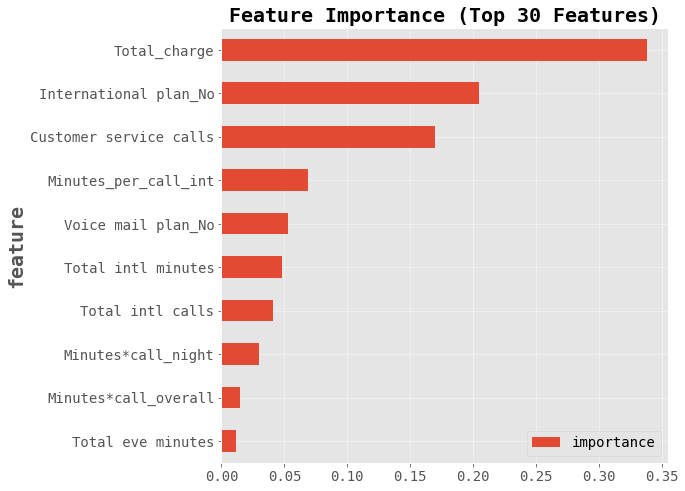

In [35]:
model = dt_model

# Make a dataframe of features and their importance
feat_imp = pd.DataFrame(model.named_steps['classifier'].feature_importances_,
                        index=get_ct_feature_names(model.named_steps['preprocessor'])
                       ).reset_index()

# Rename columns
feat_imp.columns = ['feature', 'importance']

# Average the importance because if it is a Random Forest model for multiple trees
feat_imp = feat_imp.groupby('feature').mean().sort_values(by='importance')

# Plot top 10 feature importance
feat_imp[-10:].plot(kind='barh', title='Feature Importance (Top 30 Features)');


## Shap Values
<font size=3> In this section we will use **Shap** to further explain the model

**What is Shap:**
    
The goal of SHAP is to explain the prediction of an instance x by computing the contribution of each feature to the prediction. The SHAP explanation method computes Shapley values from coalitional game theory. The feature values of a data instance act as players in a coalition. Shapley values tell us how to fairly distribute the “payout” (= the prediction) among the features. A player can be an individual feature value, e.g. for tabular data. A player can also be a group of feature values. For example to explain an image, pixels can be grouped to superpixels and the prediction distributed among them. One innovation that SHAP brings to the table is that the Shapley value explanation is represented as an additive feature attribution method, a linear model.

## Shap - Feature Importance

<font size=3> Similar plot like we made above but this time adding color by Churn category to illustrate that the features is important for prediction of both classes

In [36]:
# Training data
X_train = df;  y_train = df['Churn']; 

# Testing data
X_test = df_test;  y_test = df_test['Churn']

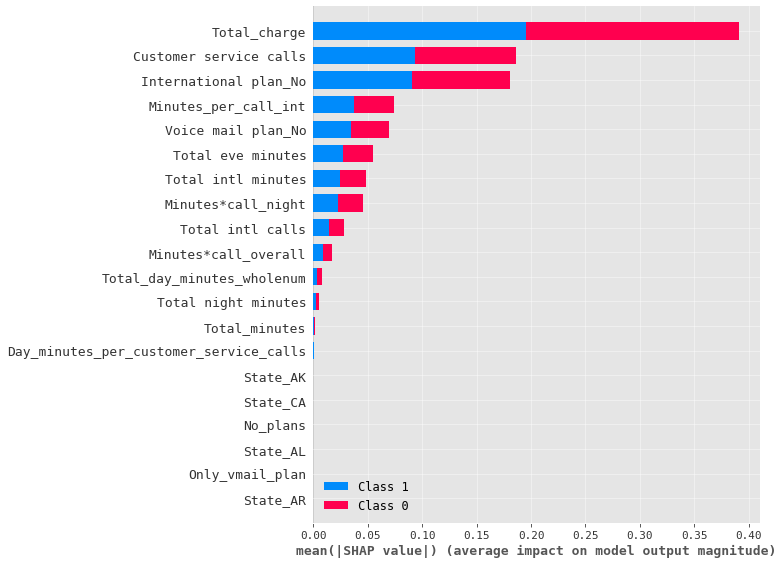

In [37]:
model = dt_model

#load JS vis in the notebook
shap.initjs() 

#set the tree explainer as the model of the pipeline
explainer = shap.TreeExplainer(model['classifier'])

#get transformed X_test from pipeline
X_shap = model['feature_engineering'].transform(X_test)
X_shap = model['preprocessor'].transform(X_shap)

#get Shap values
shap_values = explainer.shap_values(X_shap)

# Feature names
feat_names = get_ct_feature_names(model.named_steps['preprocessor'])

#plot the feature importance
shap.summary_plot(shap_values, feat_names, plot_type="bar")

## Shap - Summary Violin Plot
<font size=3>The summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value. The color represents the value of the feature from low to high. Points are shown as violin plot, so we get a sense of the distribution of the Shapley values per feature. The features are ordered according to their importance.
    
**Analysis Summary**
- The higher the **Total_charge** (red) the more likely a customer will churn and vice versa.
    
    
- However, there are some customers who tend to churn less even though they have medium to high **Total_charge** (red points towards extreme left across Total_charge feature). We will explore this group more in Shap dependence plot
    
    
- More **Customer service calls** (red) generally an indication of customer churning
    
    
- Customer with an **No International plan** (red) tend to churn less

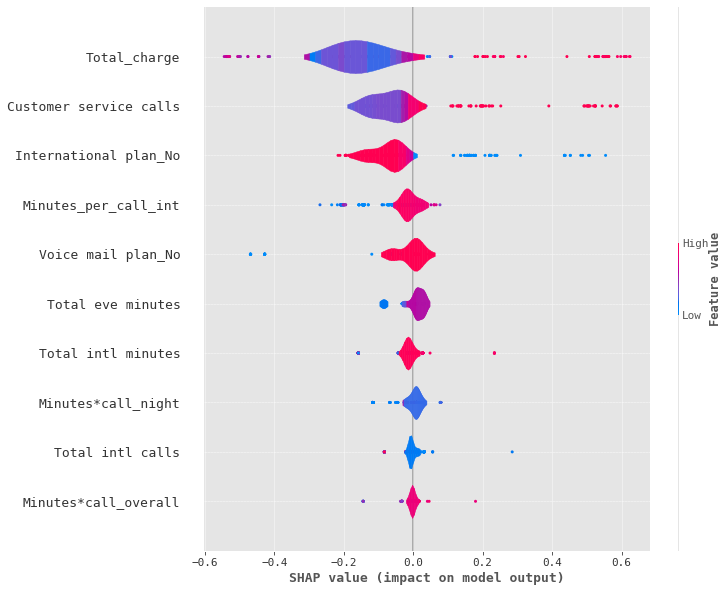

In [38]:
#Summary violin plot
shap.summary_plot(shap_values[1], features=X_shap, feature_names=feat_names, max_display=10,
                  plot_type='violin', plot_size=(10,10), title = 'Shap Summary Plot')

## Shap - Dependence Plot
<font size=3>SHAP feature dependence plots a point with the feature value on the x-axis and the corresponding Shapley value on the y-axis. Then color the SHAP feature dependence plot with another interaction feature (by default it gets colored by the strongest interaction feature)

### Dependence plot of Total Charge

<font size=3><br/>**Analysis Summary**
- **Customer service calls** have strongest interaction with **Total_charge**
    
    
- Generally higher **Total_charge** leads to higher Shap values i.e. increased likelihood of Churn
    
    
- Looking together with interaction features we observe two isolated red clusters, both with high number of customer calls:
    - **Red cluster towards the bottom of the chart** are customers with average to high bill and high number of customer calls, however the Shap values indicate that they are less likely to churn. This could mean that most of the customer service calls for these customers could be promotion/discount related and not issue/complaint related.
    - On the other hand **red cluster towards middle left of the plot** is a group of totally different customers. These have low total bill and high customer service calls and the Shap values indicate that they are likely to churn. These could be customers who are churning not due to bill or financial reason but due to dissatisfaction with the service it self.



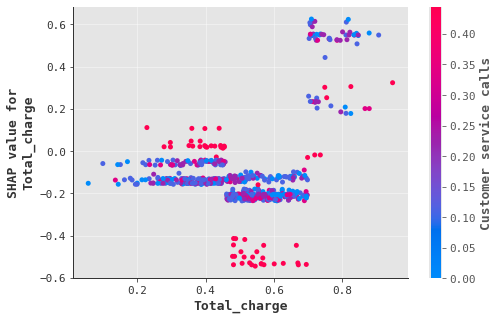

In [39]:
# Dependence plot Total Charge vs Customer Service Calls (strongest interaction feature for Total Charge)  
shap.dependence_plot(23, shap_values[1], X_shap, interaction_index=10, feature_names = feat_names, dot_size=25)

### Dependence plot of Total International Minutes

<font size=3><br/>**Analysis Summary**
- **International plan_Yes** have strongest interaction with **Total intl minutes**
    
    
- Generally higher **Total intl miutes** have little to no impact on Churn (points mostly flat along y-axis value = 0)
    
    
- However, looking together with interaction features we observe two isolated red clusters, both with an international plan:
    - **Red cluster towards the bottom of the chart** are customers who made significant international calls and had an international plan.The Shap values indicate that they are less likely to churn. This could mean that customers who enroll in International plan tend to be more loyal with the company.
    - However, this trend breaks when the total intl minutes exceed a certain threshold.**Red cluster towards top right of the plot** meaning there is a certain value for number of intl minutes above which customers tend to churn. This could be because after a certain amount of minutes the international call rates increase leading to a higher bill in the customer statement.



In [65]:
# Dependence plot Total intl minutes vs International plan_yes (strongest interaction feature for Total intl minutes)
shap.dependence_plot(8, shap_values[1], X_shap, interaction_index=90, feature_names = feat_names, dot_size=25)

## Shap - Individual Prediction Analysis

<font size=3> Now we will plot individual predictions to analyze each customer individually. A good use case would be to look at wrong predictions and try to understand why the model predicted wrong
    
**Find the customers with:**
    
**1:** highest predicted probability to churn who actually DIDN'T churn
    
**2:** highest predicted probability to NOT churn who actually DID churn

In [66]:
# ------------------------------------------------------------------------------------------------------
# Analyze Individual Predictions
# ------------------------------------------------------------------------------------------------------
# Get prediction and predicted probability of churn
y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:,1]

# Make a copy of X_test and append y_test_proba and y_test to it
result = X_test.copy(deep=True)
result['churn_pred'] = y_test_pred
result['churn_proba'] = y_test_proba

# Get all wrong predictions
wrong_pred = result[result['Churn'] != result['churn_pred']]
wrong_pred.sort_values(by=['churn_proba', 'churn_pred'], ascending=[False, True], inplace=True)
wrong_pred

State  Account length  Area code International plan Voice mail plan  \
444    MS              98        415                Yes             Yes   
510    IN              81        408                 No             Yes   
390    SD              91        415                 No              No   
14     LA             155        415                 No              No   
100    MO              92        415                 No              No   
201    NJ              48        510                 No             Yes   
386    NC             162        408                 No             Yes   
387    TX             119        510                 No              No   
458    WI             153        510                 No              No   
540    NJ             134        510                 No             Yes   
52     SD             144        408                 No             Yes   
282    ID             193        415                 No              No   
179    MA             136        408                Yes              No   
494    RI             125        408                 No              No   

     Number vmail messages  Total day minutes  Total day calls  \
444                     23              245.5               54   
510                     46              168.3              124   
390                      0              153.0              123   
14                       0              203.4              100   
100                      0              154.0              122   
201                     22              152.0               63   
386                     26              179.7              144   
387                      0               81.9               75   
458                      0              159.5              103   
540                     34              247.2              105   
52                      48              189.8               96   
282                      0               96.8               92   
179                      0              199.6               89   
494                      0              113.0              108   

     Total day charge  Total eve minutes  ...  Total night minutes  \
444             41.74              292.7  ...                184.0   
510             28.61              270.9  ...                222.5   
390             26.01              141.1  ...                171.5   
14              34.58              190.9  ...                196.0   
100             26.18              329.8  ...                288.0   
201             25.84              258.8  ...                263.2   
386             30.55              218.1  ...                212.3   
387             13.92              253.8  ...                213.1   
458             27.12              275.5  ...                176.7   
540             42.02              225.5  ...                186.3   
52              32.27              123.4  ...                214.2   
282             16.46              142.6  ...                210.1   
179             33.93              211.4  ...                 72.4   
494             19.21              169.2  ...                156.6   

     Total night calls  Total night charge  Total intl minutes  \
444                 90                8.28                10.8   
510                 98               10.01                 6.7   
390                 76                7.72                10.3   
14                 119                8.82                 8.9   
100                117               12.96                 5.6   
201                109               11.84                15.7   
386                105                9.55                 9.3   
387                125                9.59                 8.9   
458                126                7.95                10.1   
540                 76                8.38                 6.1   
52                 106                9.64                 6.5   
282                115                9.45  

### Predicted churn who actually DIDN'T churn

<font size=3>**Analysis Summary**
- Model predicted customer to churn because he/she had high bill and an international plan

In [67]:
didnt_churn = wrong_pred.head(1)
shap.force_plot(explainer.expected_value[1], shap_values[1][didnt_churn.index,:], 
                X_shap[didnt_churn.index,:], feature_names=feat_names,link="logit")

### Predicted Not churn who actually DID churn

<font size=3>**Analysis Summary**
- Model predicted customer will not churn because he/she had low bill and low customer service calls.
- It is important to note that there is no feature which increased likelihood to churn (red bars), this could mean that our features are still missing some information and we need to collect more data about customers to identify why this particular customer churned. From the dataset we have it may not be possible to predict

In [68]:
did_churn = wrong_pred.tail(1)
shap.force_plot(explainer.expected_value[1], shap_values[1][did_churn.index,:], 
                X_shap[did_churn.index,:], feature_names=feat_names,link="logit")

In [ ]:
# shap.force_plot(explainer.expected_value[0], shap_values[0], X_shap, feature_names=feat_names,link="logit")